In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [73]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
df1 = pd.read_csv(url)

In [70]:
df1

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,1,11350,Emma,2004,M,NY,62
1,2,11351,Madison,2004,M,NY,48
2,3,11352,Hannah,2004,M,NY,46
3,4,11353,Grace,2004,M,MT,44
4,5,11354,Emily,2004,M,MT,41
5,6,11355,Abigail,2004,M,MT,37
6,7,11356,Olivia,2004,M,MT,33
7,8,11357,Isabella,2004,F,NY,30
8,9,11358,Alyssa,2004,F,NY,29
9,10,11359,Sophia,2004,F,MT,28


In [71]:
df1.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [72]:
df1

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,M,NY,62
1,11351,Madison,2004,M,NY,48
2,11352,Hannah,2004,M,NY,46
3,11353,Grace,2004,M,MT,44
4,11354,Emily,2004,M,MT,41
5,11355,Abigail,2004,M,MT,37
6,11356,Olivia,2004,M,MT,33
7,11357,Isabella,2004,F,NY,30
8,11358,Alyssa,2004,F,NY,29
9,11359,Sophia,2004,F,MT,28


In [73]:
df1.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,M,NY,62
1,11351,Madison,2004,M,NY,48
2,11352,Hannah,2004,M,NY,46
3,11353,Grace,2004,M,MT,44
4,11354,Emily,2004,M,MT,41


In [74]:
df1.sort_values(by='Count', inplace=True)

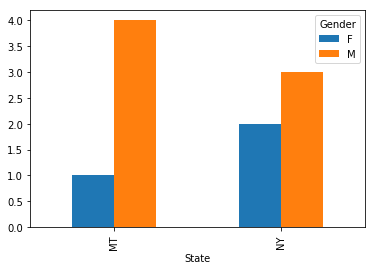

In [75]:
df1.groupby(['State', 'Gender']).size().unstack().plot(kind='bar')
plt.show()

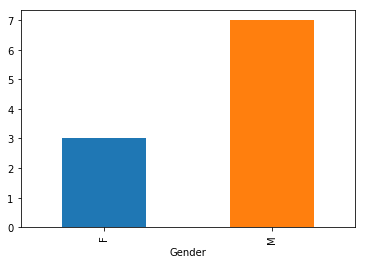

In [81]:
df1.groupby(['Gender']).size().plot(kind='bar')

In [112]:
df1.loc[:,'Name']

AttributeError: 'int' object has no attribute 'medain'

In [127]:
df1.sort_values('Name')

,Id,Name,Year,Gender,State,Count
5,11355,Abigail,2004,M,MT,37
8,11358,Alyssa,2004,F,NY,29
4,11354,Emily,2004,M,MT,41
0,11350,Emma,2004,M,NY,62
3,11353,Grace,2004,M,MT,44
2,11352,Hannah,2004,M,NY,46
7,11357,Isabella,2004,F,NY,30
1,11351,Madison,2004,M,NY,48
6,11356,Olivia,2004,M,MT,33
9,11359,Sophia,2004,F,MT,28


[ 39.55674768 -10.20239658   0.9728992 ]
[[ 1.23446192e+00 -6.83411302e-02  1.55621135e-02]
 [-6.83411302e-02  2.27433260e+00  2.35521514e-04]
 [ 1.55621135e-02  2.35521514e-04  9.42227793e-02]]
[25.16005909  7.50527207  6.48764923]
[[ 0.27999117  0.01026382  0.0056355 ]
 [ 0.01026382  0.5219241  -0.0058829 ]
 [ 0.0056355  -0.0058829   0.03909714]]


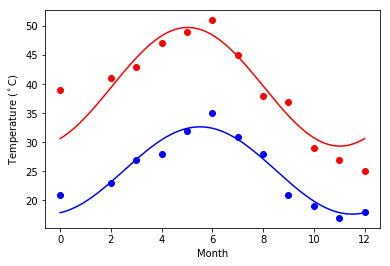

In [70]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.array([0,2,3,4,5,6,7,8,9,10,11,12])


def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

optVal_max, cov_max = optimize.curve_fit(yearly_temps, months, Max_temp)
optVal_min, cov_min = optimize.curve_fit(yearly_temps, months, Min_temp)

days = np.linspace(0, 12, 365)

plt.figure()
plt.plot(months, Max_temp, 'ro')
plt.plot(days, yearly_temps(days, *optVal_max), 'r-')
plt.plot(months, Min_temp, 'bo')
plt.plot(days, yearly_temps(days, *optVal_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [40]:
from scipy import optimize

In [2]:
optimize.curve_fit

30


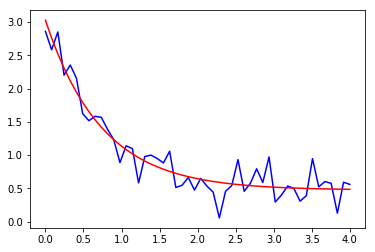

In [44]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = optimize.curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    